## Código para extraer las series de tiempo del Nodo Continuo implementado desde FireBase Realtime Database.

**INSTRUCCIONES:**

Solo Hay que hacer click en > Entorno de ejecución -> Ejecutar todo.

Ejemplo:
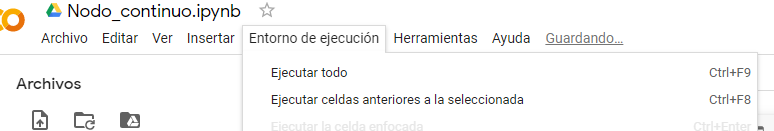

# Conexión a base de datos

In [1]:
# %% Credenciales, conexión y referencia
% pip install firebase_admin
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import time
import pandas as pd
from google.colab import files
import requests

%matplotlib inline

# Para cargar el archivo manualmente descomente la línea files.upload y
# cargue manualmente el el archivo "firebase-adminsdk.json".
# Este archivo puede descargarse desde : 
# https://github.com/niclabs/water-monitoring/blob/master/driffting/RPi-FBase/firebase-adminsdk.json

# files.upload()

# Url de la clave de cuenta de servicio:
url = 'https://raw.githubusercontent.com/niclabs/water-monitoring/master/driffting/RPi-FBase/firebase-adminsdk.json'
cert = requests.get(url).json()

# Fetch the service account key JSON file contents
cred = credentials.Certificate(cert)
# Initialize the app with a service account, granting admin privileges
try: 
  firebase_admin.initialize_app(cred, {
      'databaseURL': 'https://water-monitoring-46b05-default-rtdb.firebaseio.com/'
    })
except:
  print('Ya se cargó la DB previamente u ocurrio un error.')

#%% Referencia a la base de datos
ref = db.reference('datalogger/2-push')



# Manejo con Pandas

In [2]:
# Cargando el dataframe con los datos de la base de datos

db = ref.get()
db_df=pd.DataFrame(data=db).transpose()

db_df['timestamp'] = pd.to_datetime(db_df['timestamp'], unit='s')


db_df.timestamp = db_df.timestamp.dt.tz_localize('UTC').dt.tz_convert('Chile/Continental')
db_df.timestamp = db_df.timestamp.dt.tz_localize(None)

In [3]:
# Se crea el archivo de excel y se solicita guardarlo.

# between_time(start_time, end_time[, …])

last_date = db_df['timestamp'][-1]
string_name = "Nodo_exp_Data "+str(last_date)[:-10]+".xlsx"
db_df.to_excel(string_name, sheet_name='raw_data')
files.download(string_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plots y gráficos


**Últimos 7 días**

La fecha corresponde desde  2021-01-24 13:02:57.268921852 hasta  2021-02-01 23:50:26.118778229


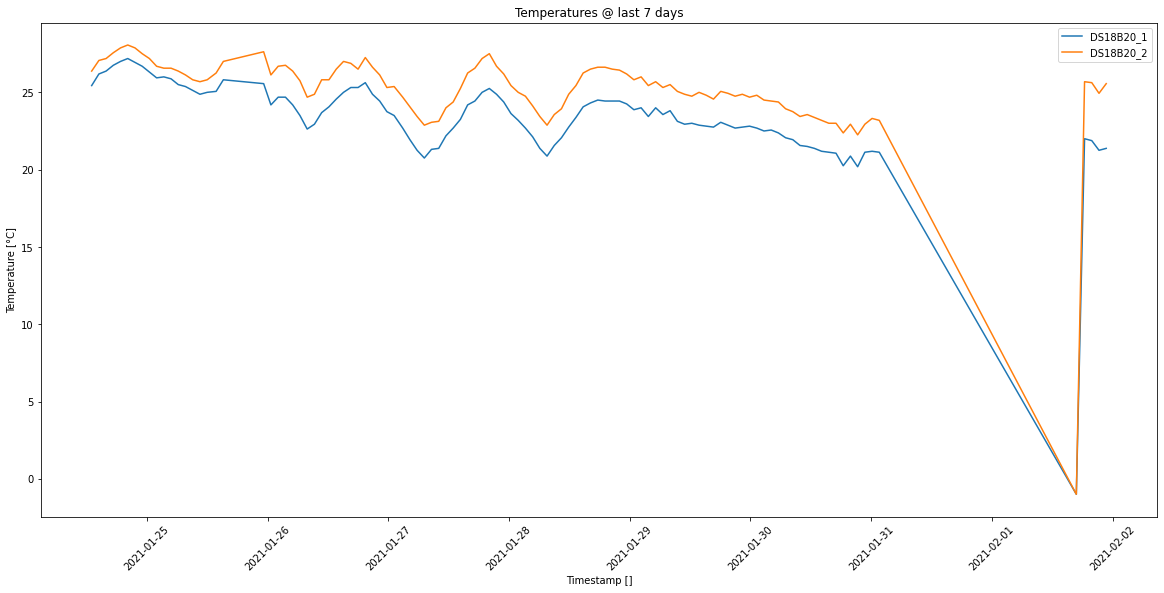

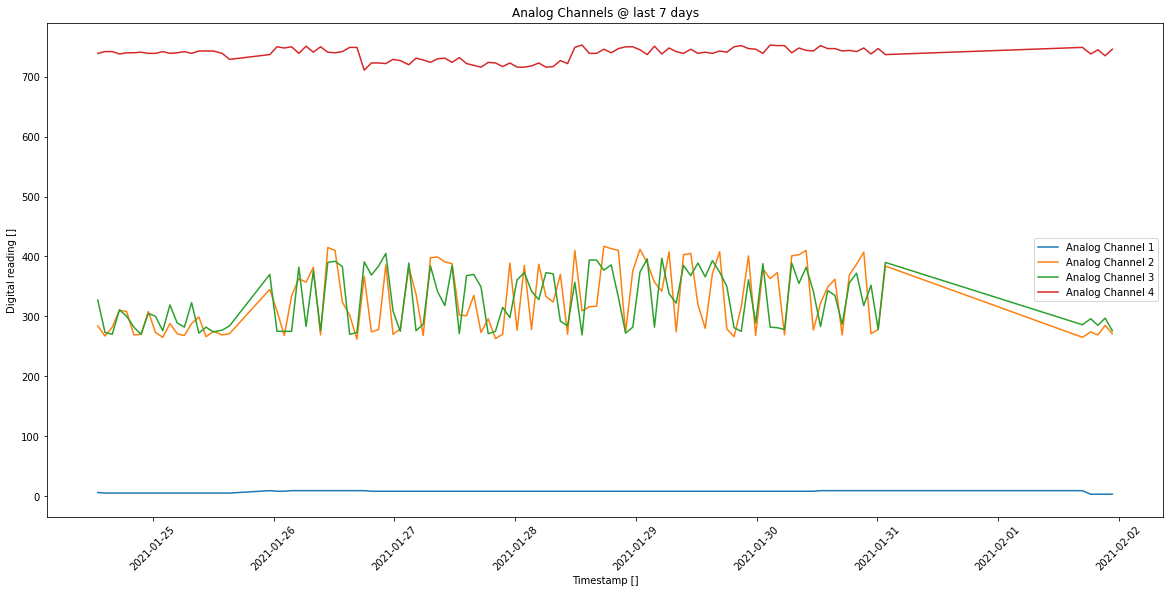

In [4]:
# Plots últimos 7 días
import matplotlib.pyplot as plt
print("La fecha corresponde desde ", db_df['timestamp'][-110000], "hasta ", db_df['timestamp'][-1])

# fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,sharey=True, figsize=(15,30))
# fig.add_subplot(2, 1, 1)
plt.figure(figsize=(20, 20))
plt.subplot(211)#,sharex=True)

plt.title('Temperatures @ last 7 days')
plt.xticks(rotation = 45)
plt.ylabel('Temperature [°C]')
plt.xlabel('Timestamp []')
# plt.plot(t[-110000::1000],temp1[-110000::1000], label='DS18B20_1')
plt.plot(db_df['timestamp'][-110000::1000].values,db_df['ds18b20_1'][-110000::1000].values, label='DS18B20_1')
# plt.plot(t[-110000::1000],temp2[-110000::1000],label='DS18B20_2')
plt.plot(db_df['timestamp'][-110000::1000].values,db_df['ds18b20_2'][-110000::1000].values,label='DS18B20_2')
plt.legend()


# plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.autofmt_xdate()
# %%


plt.figure(figsize=(20, 20))
plt.subplot(212)#,sharex=True)
plt.title('Analog Channels @ last 7 days')
plt.ylabel('Digital reading []')
plt.xlabel('Timestamp []')
plt.xticks(rotation = 45) 
plt.plot(db_df['timestamp'][-110000::1000].values,db_df['channel 1'][-110000::1000].values,label='Analog Channel 1')
plt.plot(db_df['timestamp'][-110000::1000].values,db_df['channel 2'][-110000::1000].values,label='Analog Channel 2')
plt.plot(db_df['timestamp'][-110000::1000].values,db_df['channel 3'][-110000::1000].values,label='Analog Channel 3')
plt.plot(db_df['timestamp'][-110000::1000].values,db_df['channel 4'][-110000::1000].values,label='Analog Channel 4')
plt.legend()


**Data histórica**

Data Histórica: la fecha corresponde desde  2021-01-22 00:00:07.261618614  hasta  2021-02-01 23:50:26.118778229


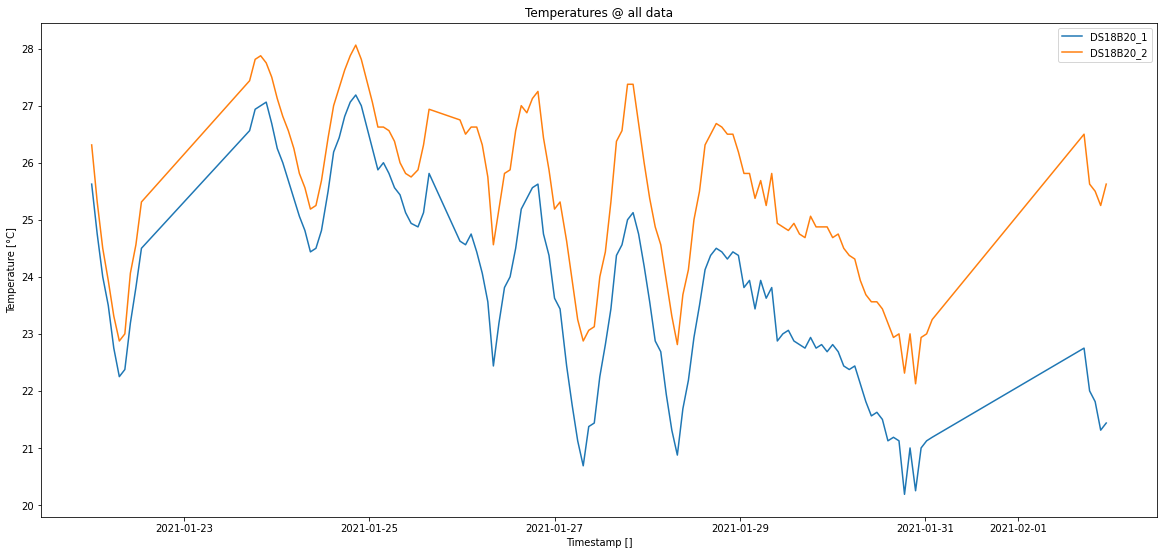

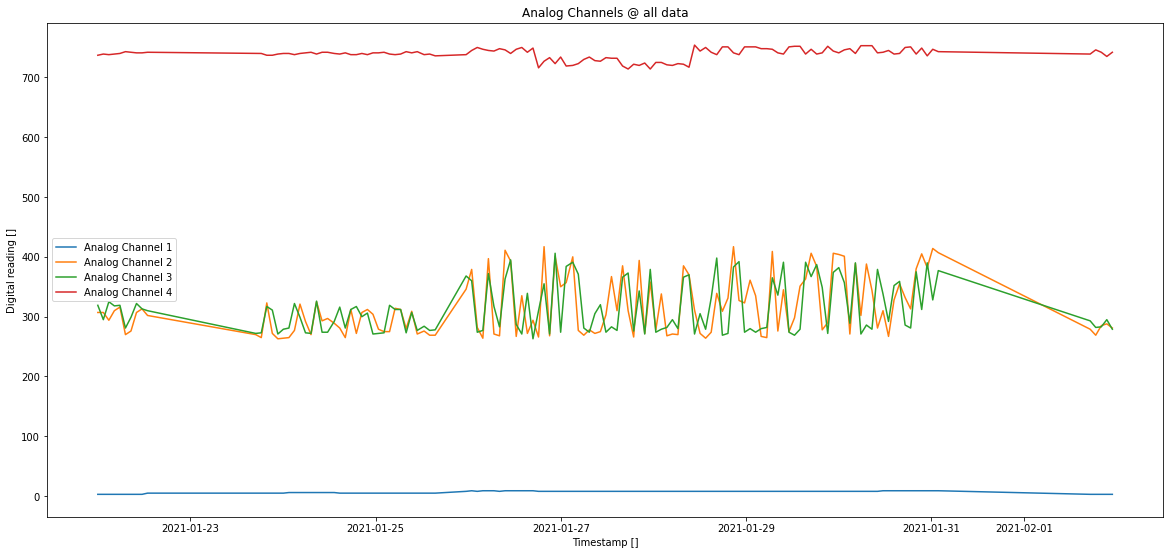

In [5]:
# primer dato día 21/01 en -> A36299 -
print("Data Histórica: la fecha corresponde desde ", str(db_df['timestamp'][36298]), " hasta ", str(db_df['timestamp'][-1]))

plt.figure(figsize=(20, 20))
plt.subplot(211)#,sharex=True)

plt.title('Temperatures @ all data')
# plt.xticks(rotation = 30)
plt.ylabel('Temperature [°C]')
plt.xlabel('Timestamp []')

plt.plot(db_df['timestamp'][36298::1000].values,db_df['ds18b20_1'][36298::1000].values, label='DS18B20_1')
plt.plot(db_df['timestamp'][36298::1000].values,db_df['ds18b20_2'][36298::1000].values,label='DS18B20_2')
plt.legend()

####################
plt.figure(figsize=(20, 20))
plt.subplot(212)#,sharex=True)
plt.title('Analog Channels @ all data')
plt.ylabel('Digital reading []')
plt.xlabel('Timestamp []')
# plt.xticks(rotation = 30) 
plt.plot(db_df['timestamp'][36298::1000].values,db_df['channel 1'][36298::1000].values,label='Analog Channel 1')
plt.plot(db_df['timestamp'][36298::1000].values,db_df['channel 2'][36298::1000].values,label='Analog Channel 2')
plt.plot(db_df['timestamp'][36298::1000].values,db_df['channel 3'][36298::1000].values,label='Analog Channel 3')
plt.plot(db_df['timestamp'][36298::1000].values,db_df['channel 4'][36298::1000].values,label='Analog Channel 4')
plt.legend()

# OLD code

In [6]:


# # %%  Almacenamiento de variables
# db = ref.get()
# t = []
# an1, an2, an3, an4 = [], [], [], []
# temp1, temp2, temp3 = [], [], []

# for key, val in db.items():
#     # print(type(key))
#     # print(val)
#     try:
#         # ts = time.ctime(val['timestamp'])
#         ts = time.localtime(val['timestamp'])
#         ts =  time.strftime("%a, %d %b %Y %H:%M:%S", ts)
#         # print(ts)
#         # ts = [val['timestamp']]
#         t += [ts]
#         an1 += [val['channel 1']]
#         an2 += [val['channel 2']]
#         an3 += [val['channel 3']]
#         an4 += [val['channel 4']]
#         temp1 += [val['ds18b20_1']]
#         temp2 += [val['ds18b20_2']]
#         temp3 += [val['ds18b20_3']]
#         # val['timestamp'] = ts
#         # print(val['timestamp'])
#     except:
#         val['timestamp'] = float("NaN")
#         t +=[float("NaN")]
#         an1 += [float("NaN")]
#         an2 += [float("NaN")]
#         an3 += [float("NaN")]
#         an4 += [float("NaN")]
#         temp1 += [float("NaN")]
#         temp2 += [float("NaN")]
#         temp3 += [float("NaN")]

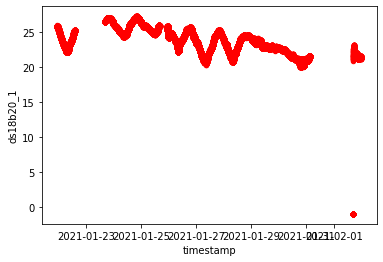

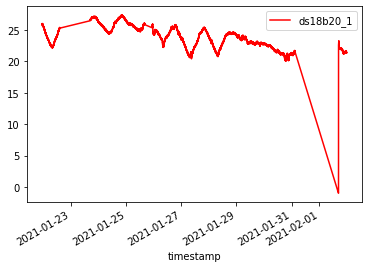

In [7]:
# db_df.plot('timestamp','an1')
db_df.plot(kind='scatter',x='timestamp',y='ds18b20_1',color='red')
db_df.plot(x='timestamp',y='ds18b20_1',color='red')